# 2018-08-09 - Extraction de points
Reprenant le code que j'ai utilisé dans le générateur de topographie, on peut extraire des edges à partir d'une image sans connaissances à priori de l'image et ensuite récuperer ça sous forme d'array de points qu'on peut manipuler pour donner des dynamiques de chaos intéressantes comme Etienne voulait:

# 1/ Exemple avec une figure d'interaction électrique

In [28]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#Posterize the image giving a smoother output
def posterize(image, level):
    indices = np.arange(0,256)
    divider = np.linspace(0,255,level+1)[1]
    quantiz = np.int0(np.linspace(0,255,level))
    color_levels = np.clip(np.int0(indices/divider),0,level-1)
    palette = quantiz[color_levels]
    img2 = palette[image]
    img2 = cv2.convertScaleAbs(img2)
    return img2

#canny edge detection with automatic parameters
def auto_canny(image, sigma=0.33):
    v = np.median(image)
    lower = int(max(0, (1.0-sigma)*v))
    upper = int(min(255, (1.0+sigma)*v))
    edged = cv2.Canny(image,lower,upper)
    return edged

#for the output
def invert(cvImage):
    cvImage = abs(255-cvImage)
    return cvImage

img = cv2.imread("index.png")
#grayed = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#blurred = cv2.GaussianBlur(grayed, (51,51), 0)
#posterized = posterize(img,12)
#img = invert(img)
canny = auto_canny(img)

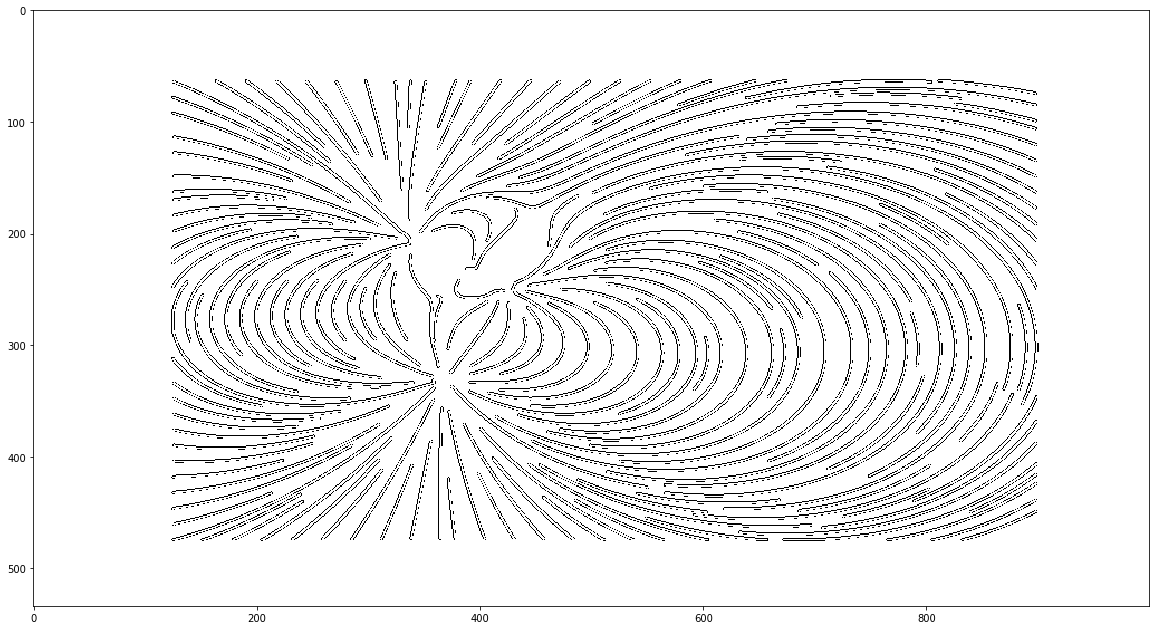

In [29]:
fig, ax = plt.subplots(figsize = (20,20))
ax.imshow(canny, cmap = 'binary')

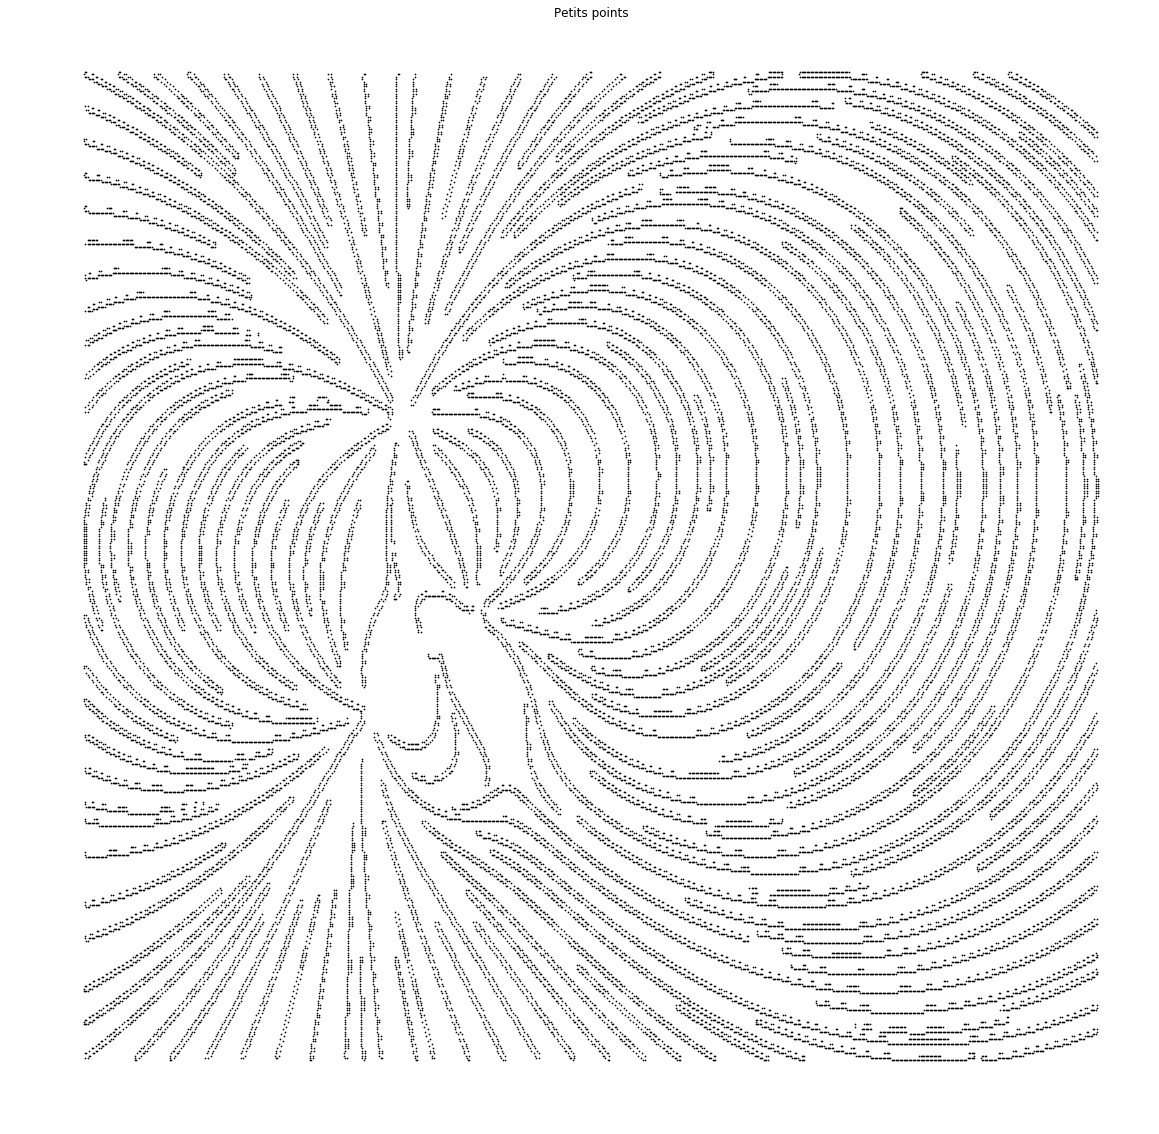

In [55]:
fig, ax = plt.subplots(figsize = (20,20))
ax.set_axis_off()
ax.scatter(np.nonzero(canny)[1], np.nonzero(canny)[0],s = .5, color = 'black')
ax.set_title('Petits points')

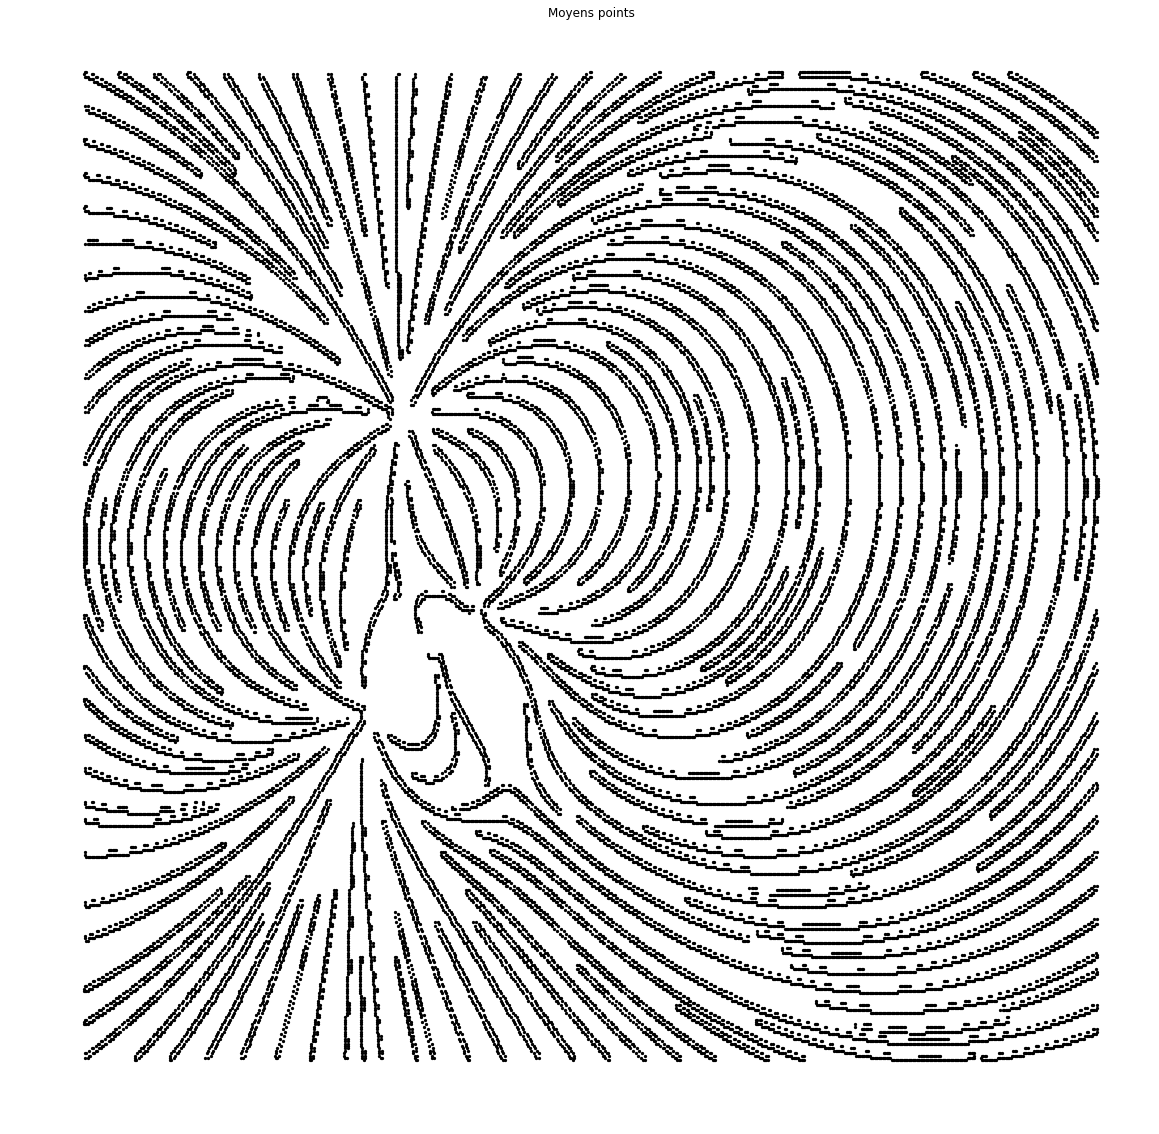

In [56]:
fig, ax = plt.subplots(figsize = (20,20))
ax.set_axis_off()
ax.scatter(np.nonzero(canny)[1], np.nonzero(canny)[0],s = 5, color = 'black')
ax.set_title('Moyens points')

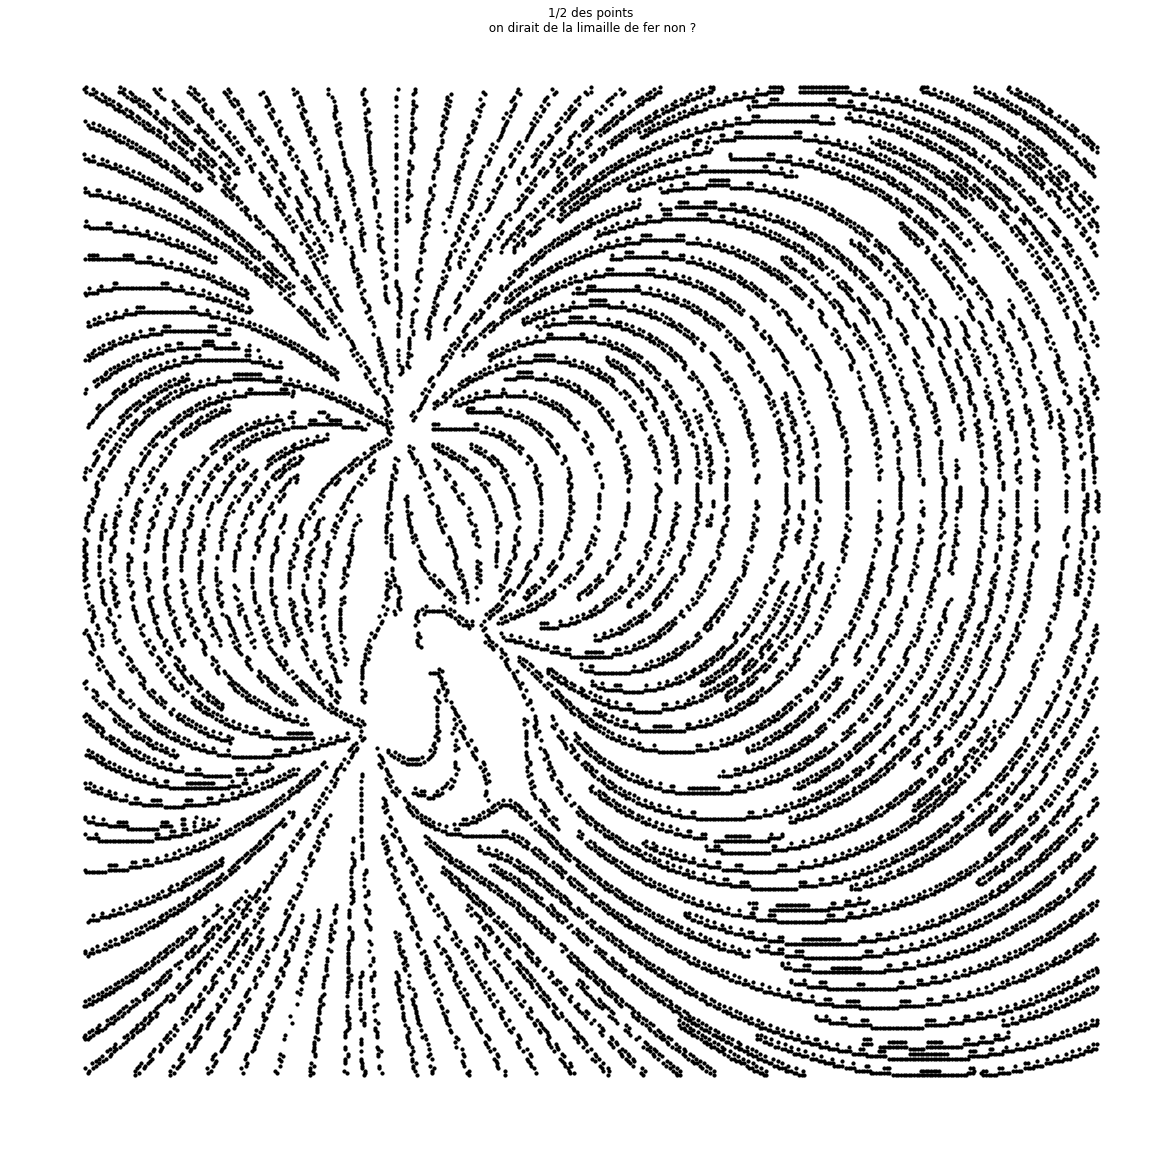

In [60]:
fig, ax = plt.subplots(figsize = (20,20))
ax.set_axis_off()

xs = np.nonzero(canny)[1]
ys = np.nonzero(canny)[0]
ax.scatter(xs[::2], ys[::2],s = 10, color = 'black')
ax.set_title('1/2 des points\n on dirait de la limaille de fer non ?')

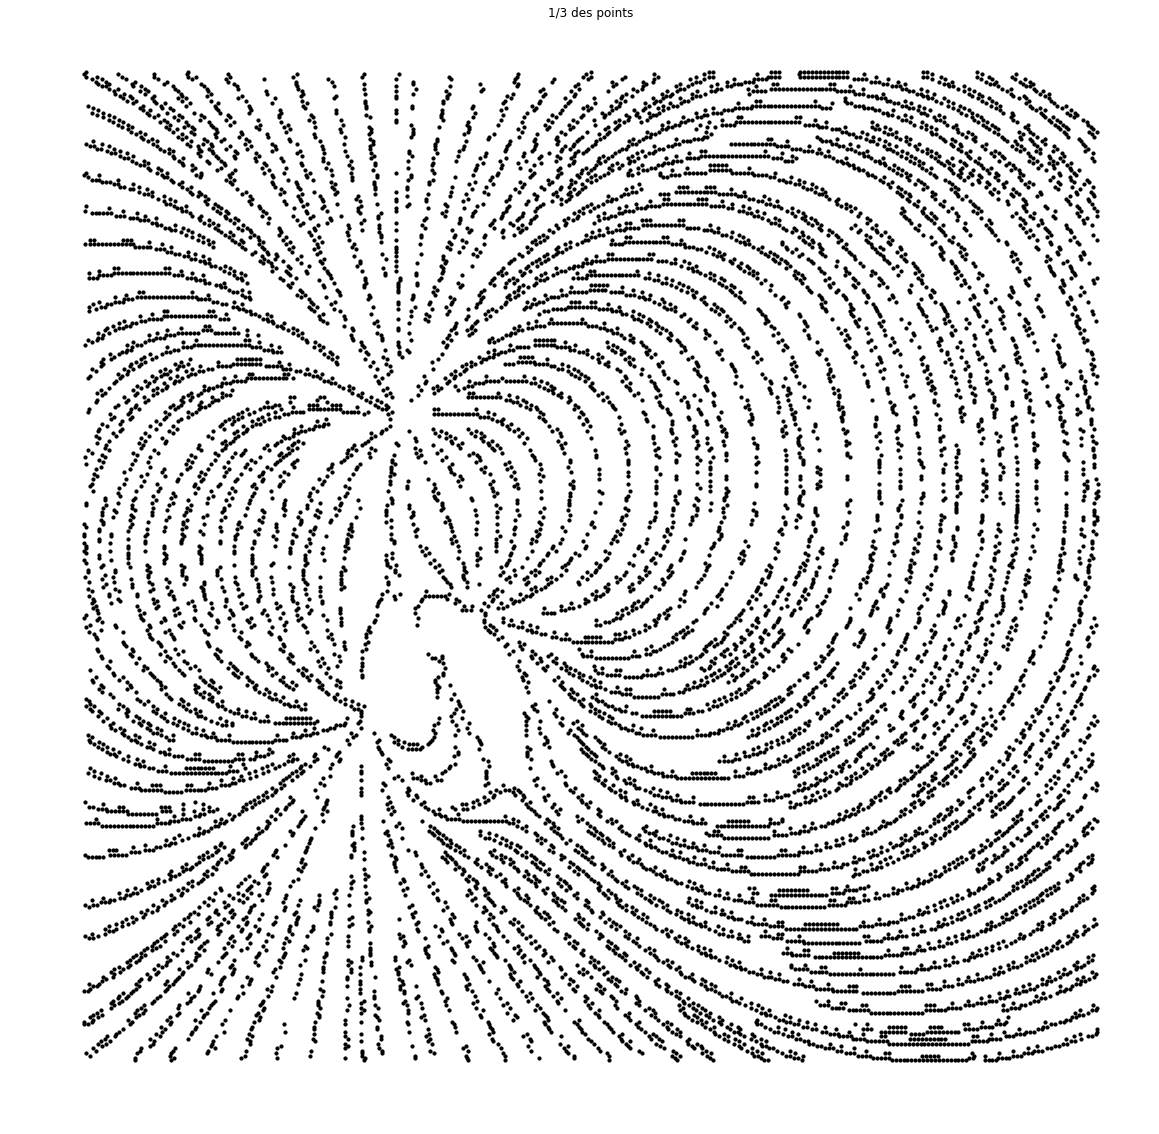

In [69]:
fig, ax = plt.subplots(figsize = (20,20))
ax.set_axis_off()

xs = np.nonzero(canny)[1]
ys = np.nonzero(canny)[0]
ax.scatter(xs[::3], ys[::3],s = 10, color = 'black')
ax.set_title('1/3 des points')

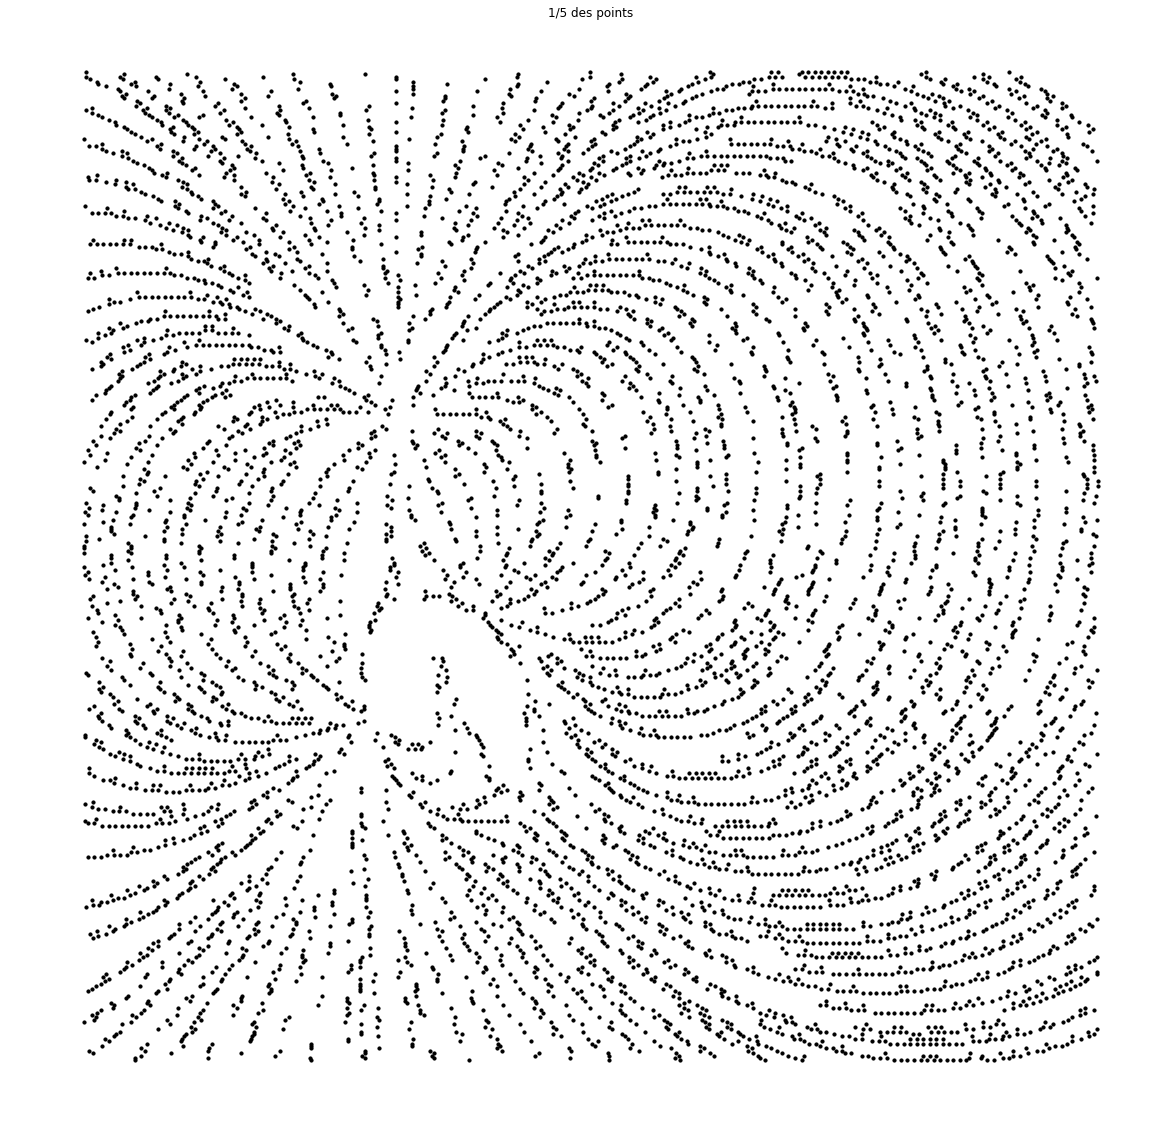

In [70]:
fig, ax = plt.subplots(figsize = (20,20))
ax.set_axis_off()

xs = np.nonzero(canny)[1]
ys = np.nonzero(canny)[0]
ax.scatter(xs[::5], ys[::5],s = 10, color = 'black')
ax.set_title('1/5 des points')

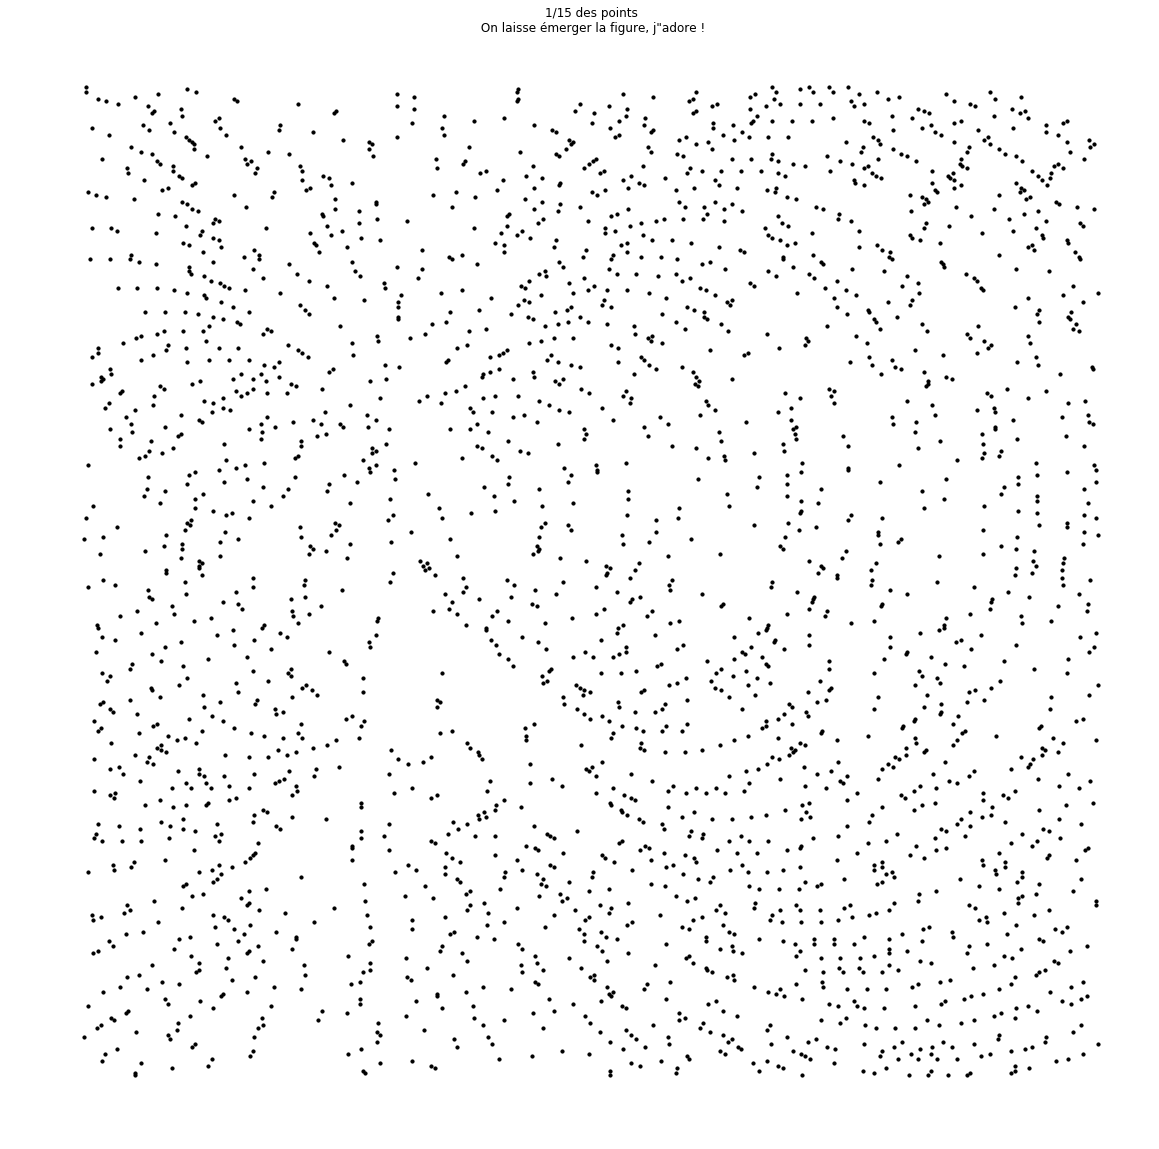

In [75]:
fig, ax = plt.subplots(figsize = (20,20))
ax.set_axis_off()

xs = np.nonzero(canny)[1]
ys = np.nonzero(canny)[0]
ax.scatter(xs[::15], ys[::15],s = 10, color = 'black')
ax.set_title('1/15 des points\n On laisse émerger la figure, j"adore !')